In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv('AB_NYC_2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [32]:
df.shape

(48895, 16)

In [12]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [34]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [40]:
df['minimum_nights'].value_counts()

1       12720
2       11696
3        7999
30       3760
4        3303
        ...  
42          1
186         1
265         1
1000        1
364         1
Name: minimum_nights, Length: 109, dtype: int64

In [14]:
pd.pivot_table(df,values='price',index='neighbourhood_group',aggfunc=(np.mean,np.std,np.min,np.max))sns/

,amax,amin,mean,std
neighbourhood_group,,,,
Bronx,2500.0,0.0,87.496792,106.709349
Brooklyn,10000.0,0.0,124.383207,186.873538
Manhattan,10000.0,0.0,196.875814,291.383183
Queens,10000.0,10.0,99.517649,167.102155
Staten Island,5000.0,13.0,114.812332,277.620403


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

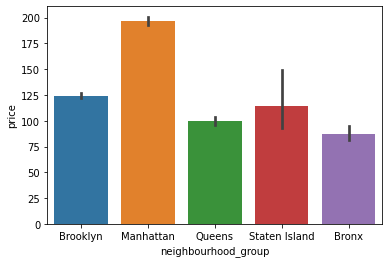

In [24]:
sns.barplot(x='neighbourhood_group',y='price', data=df)

<AxesSubplot:xlabel='availability_365', ylabel='number_of_reviews'>

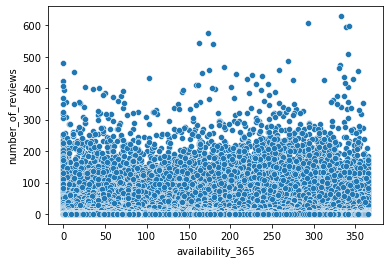

In [27]:
sns.scatterplot(x='availability_365', y='number_of_reviews', data=df)

<AxesSubplot:xlabel='room_type', ylabel='price'>

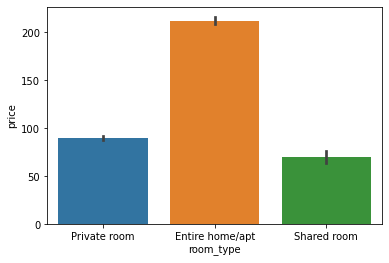

In [35]:
sns.barplot(x='room_type', y='price', data=df)

<AxesSubplot:xlabel='room_type', ylabel='price'>

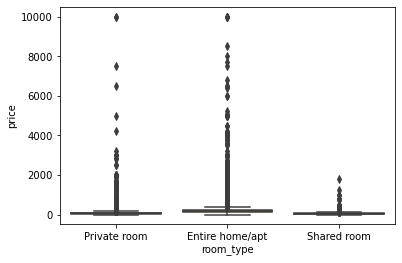

In [39]:
sns.boxplot(x='room_type',y='price', data=df)